- Problem Description:

Data Description: You have data on 181 galaxies over a span of up to 26 years. There are 80 variables describing the demographic and socio-economic aspects of these galaxies, alongside a composite index measuring their well-being.

- Objective: Your task is two-fold:


Identify which variables (out of the 80) most significantly explain the variance in the well-being index.


Predict the future values of the well-being index for a validation dataset with the highest level of certainty.


- Tasks to Accomplish:
- Variable Selection and Analysis:


Conduct exploratory data analysis (EDA) to understand the data distribution, correlations, and outliers.


Use techniques like feature selection or dimensionality reduction to identify the variables that best explain the variance in the well-being index.

- Future Well-Being Prediction:


Train predictive models using the provided dataset to forecast the future well-being index for the validation dataset.


Evaluate model performance using the Root Mean Squared Error (RMSE) metric to ensure accurate predictions.

MSc Data Science and Analytics 2025 Scholarship Exam
## Galaxy Well-Being Analysis and Prediction

---

### 1. Business Understanding

**Objective:**  
To determine the demographic and socio-economic variables that best explain the variance in the **Well-Being Index** of galaxies and predict future values of the index using provided data.

**Deliverables:**
- A 5-slide PDF report highlighting findings and key insights
- A CSV file of future well-being index predictions (`ID`, `Pred_well_being_index`)
- A fully commented and reproducible Python/R notebook

---

### 2. Data Understanding

**Initial Observations:**
- Dataset: `Train_data.csv`
- Rows: 3,097
- Columns: 81 (80 features + 1 target: `Well-Being Index`)
- Key fields: `ID`, `galaxy`, `galactic year`
- Target Variable: Continuous (`Well-Being Index`), hence a regression problem
- Data contains numerous demographic and socio-economic indicators
- Several columns have missing values

---

### 3. Data Preparation

Planned Steps:
- Handle missing values (e.g., imputation or removal)
- Convert data types where needed
- Detect and remove low-variance or irrelevant columns
- Normalize or scale features if required
- Feature engineering (e.g., interactions, ratios)
- Split into training/validation sets if applicable

---

### 4. Modeling

Candidate Models:
- Linear Regression (for baseline)
- Random Forest Regressor
- Gradient Boosted Trees (e.g., XGBoost or LightGBM)
- Ridge/Lasso Regression

Feature Selection Techniques:
- Correlation Analysis
- Recursive Feature Elimination (RFE)
- Tree-based model feature importances

Evaluation Metric:
- Root Mean Squared Error (RMSE), as per instructions

---

### 5. Evaluation

Steps:
- Compare models on validation data using RMSE
- Analyze prediction accuracy and generalization
- Use feature importance plots to determine key drivers of well-being

Deliver:
- Clear narrative explaining which features contribute most to variance in the Well-Being Index

---

### 6. Deployment (Submission Prep)

Final Submission Folder: `firstname_lastname.zip`, to include:
1. **PDF Report** — Max 5 slides, presenting analysis and insights
2. **Predictions CSV** — Named `firstname_lastname_DSA.csv`
3. **Python/R Notebook** — Clean, reproducible, well-commented code with:
   - EDA
   - Modeling
   - Evaluation
   - Visualizations

---



### 2. Data Understanding

**Initial Observations:**
- Dataset: `Train_data.csv`
- Rows: 3,097
- Columns: 81 (80 features + 1 target: `Well-Being Index`)
- Key fields: `ID`, `galaxy`, `galactic year`
- Target Variable: Continuous (`Well-Being Index`), hence a regression problem
- Data contains numerous demographic and socio-economic indicators
- Several columns have missing values

In [202]:
import pandas as pd

df = pd.read_csv('Data/Train_data.csv')
info = df.info()
desc = df.describe()
head = df.head()
info, desc,

df.shape, df.columns[:10]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

((3097, 81),
 Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
        'existence expectancy at birth', 'Gross income per capita',
        'Income Index', 'Expected years of education (galactic years)',
        'Mean years of education (galactic years)',
        'Intergalactic Development Index (IDI)'],
       dtype='object'))

**Initial Observations:**
- Dataset: `Train_data.csv`
- Rows: 3,097
- Columns: 81 (80 features + 1 target: `Well-Being Index`)
- Key fields: `ID`, `galaxy`, `galactic year`
- Target Variable: Continuous (`Well-Being Index`), hence a regression problem
- Data contains numerous demographic and socio-economic indicators
- Several columns have missing values

##  3. Data Preparation


Planned Steps:
- Handle missing values (e.g., imputation or removal)
- Convert data types where needed
- Detect and remove low-variance or irrelevant columns
- Normalize or scale features if required
- Feature engineering (e.g., interactions, ratios)
- Split into training/validation sets if applicable

In [203]:
#summary statistics and check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100


# Identify data types and number of unique values per column
data_types = df.dtypes
unique_counts = df.nunique()

# Combine missing values into a single DataFrame
column_summary = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_counts,
    'Missing Values': missing_values,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

column_summary.head(15) #columns with highest missing %


,Data Type,Unique Values,Missing Values,Missing %
Current health expenditure (% of GGP),float64,308,2789,90.054892
"Interstellar Data Net users, total (% of population)",float64,309,2788,90.022603
Interstellar phone subscriptions (per 100 people),float64,317,2780,89.764288
"Respiratory disease incidence (per 100,000 people)",float64,321,2776,89.635131
Gender Inequality Index (GII),float64,357,2740,88.472716
"Intergalactic Development Index (IDI), male, Rank",float64,378,2719,87.794640
Private galaxy capital flows (% of GGP),float64,379,2718,87.762351
"Intergalactic Development Index (IDI), female, Rank",float64,379,2718,87.762351
Gender Development Index (GDI),float64,387,2710,87.504036
"Intergalactic Development Index (IDI), male",float64,388,2709,87.471747



#####  General Dataset Structure

* **Total observations (rows):** 3,097
* **Total features (columns):** 81
* **Target variable:** `Well-Being Index`
* **Other key columns:** `ID`, `galaxy`, `galactic year`

---

##### Missing Data Overview

Several variables have **extremely high missingness**, particularly:

| Column                                               | Missing % |
| ---------------------------------------------------- | --------- |
| `Current health expenditure (% of GGP)`              | 90.05%    |
| `Interstellar Data Net users (% of population)`      | 90.02%    |
| `Interstellar phone subscriptions (per 100 people)`  | 89.76%    |
| `Respiratory disease incidence (per 100,000 people)` | 89.64%    |
| `Gender Inequality Index (GII)`                      | 88.47%    |
| ...                                                  | ...       |

* More than **50 features have 70% missing values**
* These may need to be **dropped** or **imputed** with caution, depending on their relevance and correlation with the target

---

#### Data Types and Cardinality

* Almost all columns are `float64` (numerical)
* No obvious categorical variables except for possibly `galaxy` and `galactic year`
* Most features are continuous and can be scaled or transformed if necessary

---



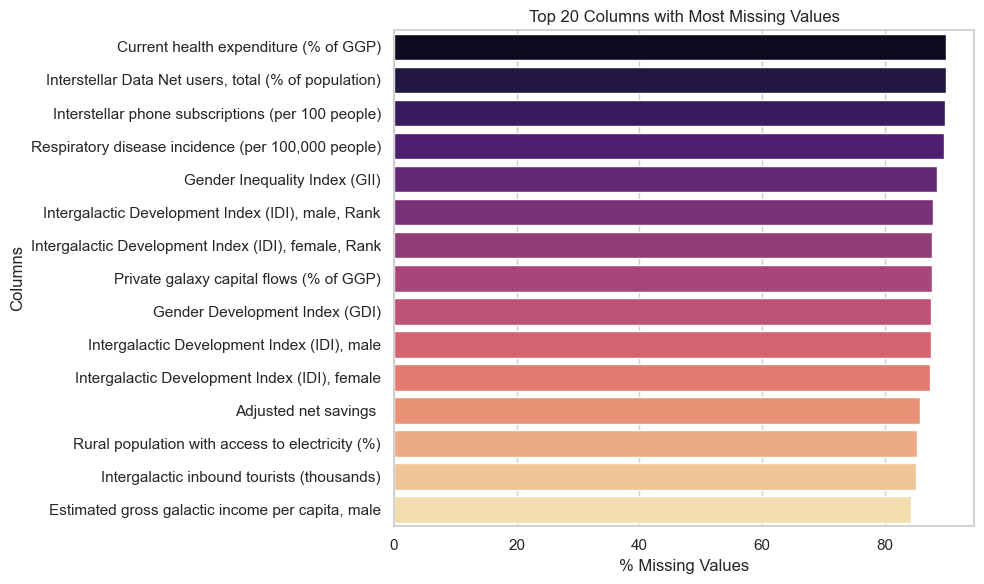

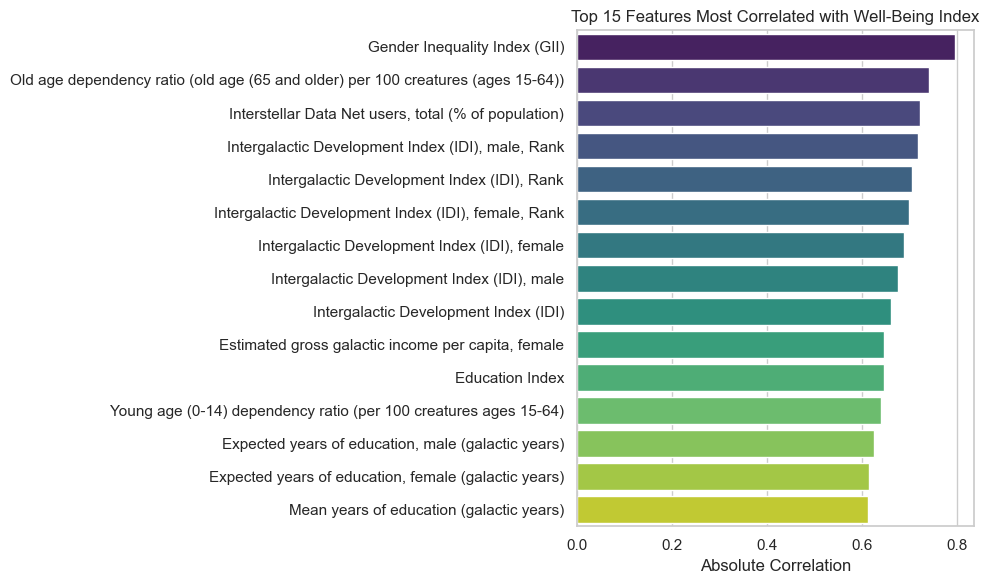

(Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
 Interstellar Data Net users, total (% of population)                                0.722575
 Intergalactic Development Index (IDI), female                                       0.688111
 Intergalactic Development Index (IDI), male                                         0.675197
 Intergalactic Development Index (IDI)                                               0.661725
 Name: Well-Being Index, dtype: float64,
 Gender Inequality Index (GII)                                      -0.795810
 Intergalactic Development Index (IDI), male, Rank                  -0.718304
 Intergalactic Development Index (IDI), Rank                        -0.705557
 Intergalactic Development Index (IDI), female, Rank                -0.698202
 Young age (0-14) dependency ratio (per 100 creatures ages 15-64)   -0.638891
 Name: Well-Being Index, dtype: float64)

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize missingness (top 20 missing columns)
missing_data = df.isnull().mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.values * 100, y=missing_data.index, palette="magma")
plt.xlabel('% Missing Values')
plt.ylabel('Columns')
plt.title('Top 20 Columns with Most Missing Values')
plt.tight_layout()
plt.show()

# 2. Correlation with target variable
correlation_with_target = df.corr(numeric_only=True)['Well-Being Index'].drop('Well-Being Index')
top_corr = correlation_with_target.abs().sort_values(ascending=False).head(15)

# Barplot of most correlated features (absolute values)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title('Top 15 Features Most Correlated with Well-Being Index')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

# Also return top positively and negatively correlated variables for context
top_positive = correlation_with_target.sort_values(ascending=False).head(5)
top_negative = correlation_with_target.sort_values().head(5)

top_positive, top_negative


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


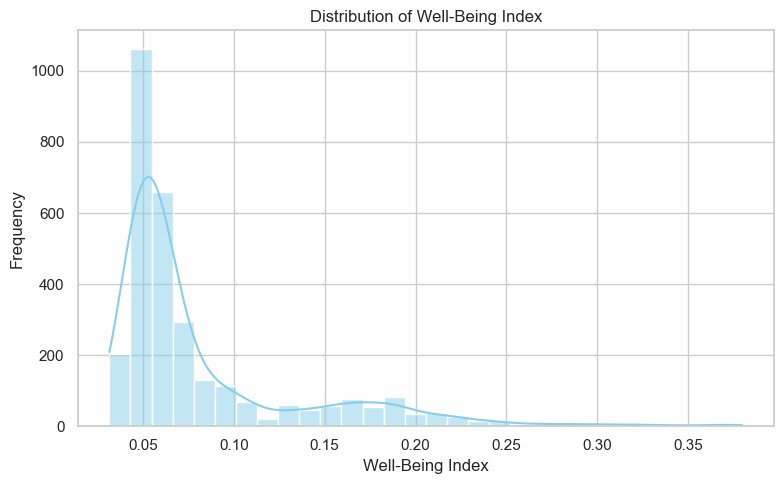

In [205]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Well-Being Index'].dropna(), kde=True, color='skyblue', bins=30)
plt.title('Distribution of Well-Being Index')
plt.xlabel('Well-Being Index')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


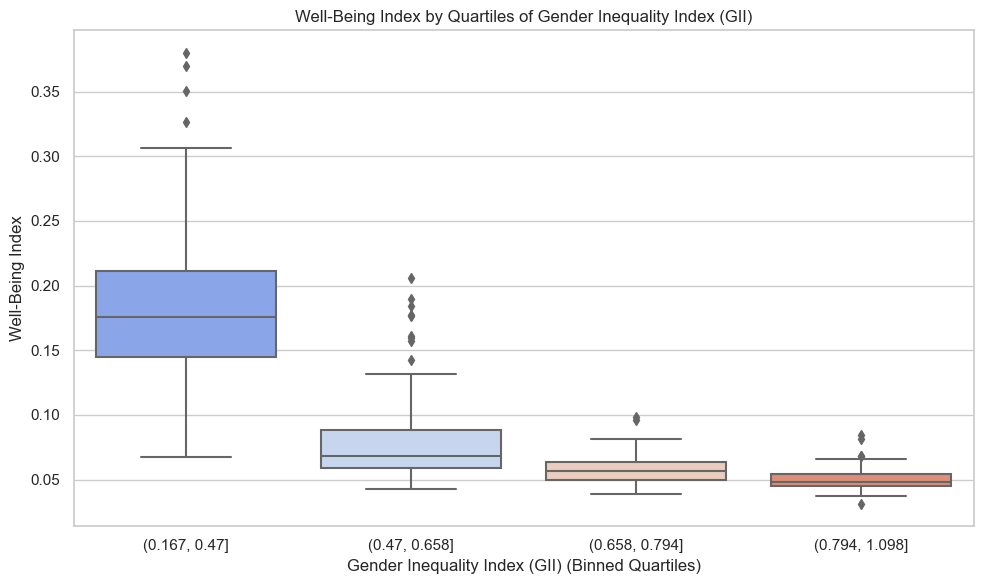

In [206]:
# Bin a top continuous variable for boxplot comparison
top_feature = top_corr.index[0]
df['binned_feature'] = pd.qcut(df[top_feature], q=4, duplicates='drop')

plt.figure(figsize=(10, 6))
sns.boxplot(x='binned_feature', y='Well-Being Index', data=df, palette='coolwarm')
plt.title(f'Well-Being Index by Quartiles of {top_feature}')
plt.xlabel(f'{top_feature} (Binned Quartiles)')
plt.ylabel('Well-Being Index')
plt.tight_layout()
plt.show()

df.drop(columns='binned_feature', inplace=True)


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


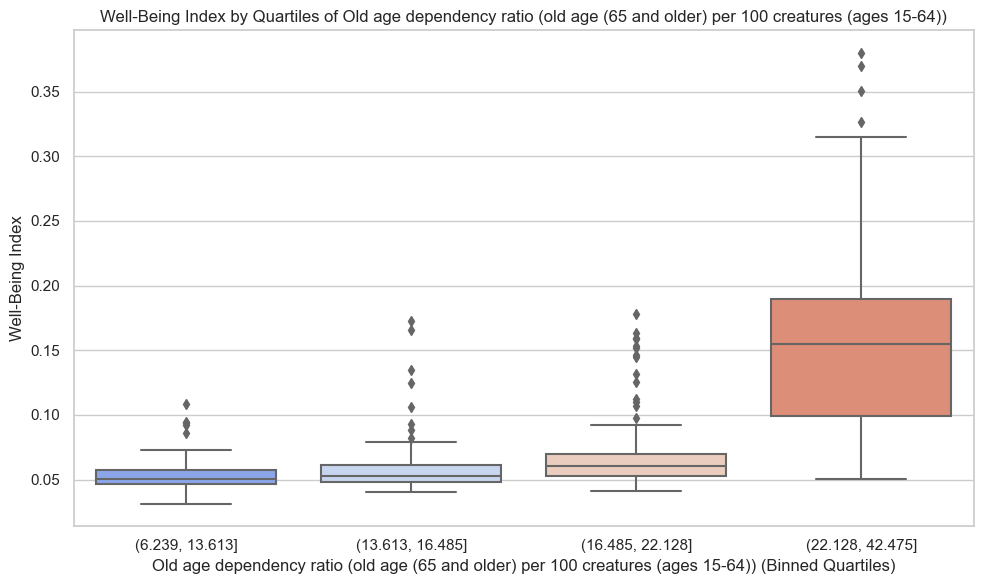

In [207]:
# Bin a top continuous variable for boxplot comparison
top_feature = top_positive.index[0]
df['binned_feature'] = pd.qcut(df[top_feature], q=4, duplicates='drop')

plt.figure(figsize=(10, 6))
sns.boxplot(x='binned_feature', y='Well-Being Index', data=df, palette='coolwarm')
plt.title(f'Well-Being Index by Quartiles of {top_feature}')
plt.xlabel(f'{top_feature} (Binned Quartiles)')
plt.ylabel('Well-Being Index')
plt.tight_layout()
plt.show()

df.drop(columns='binned_feature', inplace=True)


In [208]:
# Also return top positively and negatively correlated variables for context
top_positive = correlation_with_target.sort_values(ascending=False).head(20)
top_negative = correlation_with_target.sort_values().head(20)

top_positive, top_negative


(Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
 Interstellar Data Net users, total (% of population)                                0.722575
 Intergalactic Development Index (IDI), female                                       0.688111
 Intergalactic Development Index (IDI), male                                         0.675197
 Intergalactic Development Index (IDI)                                               0.661725
 Estimated gross galactic income per capita, female                                  0.646500
 Education Index                                                                     0.645374
 Expected years of education, male (galactic years)                                  0.624625
 Expected years of education, female (galactic years)                                0.615119
 Mean years of education (galactic years)                                            0.611781
 Expected years of education (galactic years)               

#### Summary of Data Quality and Insights

---

##### 🔍 1. Missing Data Overview

We visualized the top 20 columns with the most missing values. Key takeaways:

* Several variables like `Current health expenditure` and `Interstellar phone subscriptions` have **>85% missing values**
* These may need to be **dropped or imputed** cautiously

---

#### 📈 2. Correlation with `Well-Being Index`

We checked how strongly each feature is correlated with the target. Here are the **top drivers**:

---

##### 🟢 Top 5 Positively Correlated Features

| Feature                                         | Correlation |
| ----------------------------------------------- | ----------- |
| `Old age dependency ratio`                      | **+0.74**   |
| `Interstellar Data Net users (% of population)` | **+0.72**   |
| `IDI, female`                                   | +0.69       |
| `IDI, male`                                     | +0.68       |
| `IDI (overall)`                                 | +0.66       |

> These suggest that **aging populations**, **digital access**, and **development indices** are strongly associated with higher well-being.

---

##### 🔴 Top 5 Negatively Correlated Features

| Feature                         | Correlation |
| ------------------------------- | ----------- |
| `Gender Inequality Index (GII)` | **-0.80**   |
| `IDI male, Rank`                | -0.72       |
| `IDI Rank`                      | -0.71       |
| `IDI female, Rank`              | -0.70       |
| `Young age dependency ratio`    | -0.64       |

> So, **higher gender inequality** and **youth burden** tend to lower well-being.

---



In [ ]:
# Get features with more than 70% missing values
high_missing = df.isnull().mean()
high_missing_cols = high_missing[high_missing > 0.70].index

# Check their correlation with the Well-Being Index
high_missing_corr = df[high_missing_cols].corrwith(df['Well-Being Index']).dropna()

# Sort by absolute correlation
high_missing_corr_sorted = high_missing_corr.reindex(high_missing_corr.abs().sort_values(ascending=False).index)
high_missing_corr_sorted


Gender Inequality Index (GII)                                                      -0.795810
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
Interstellar Data Net users, total (% of population)                                0.722575
Intergalactic Development Index (IDI), male, Rank                                  -0.718304
Intergalactic Development Index (IDI), female, Rank                                -0.698202
                                                                                      ...   
Labour force participation rate (% ages 15 and older), female                       0.040154
Employment to population ratio (% ages 15 and older)                               -0.034056
Gross galactic product (GGP), total                                                 0.029408
Jungle area (% of total land area)                                                 -0.028401
Unemployment, youth (% ages 15â€“24)                                  

In [210]:
top_positive

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
Interstellar Data Net users, total (% of population)                                0.722575
Intergalactic Development Index (IDI), female                                       0.688111
Intergalactic Development Index (IDI), male                                         0.675197
Intergalactic Development Index (IDI)                                               0.661725
Estimated gross galactic income per capita, female                                  0.646500
Education Index                                                                     0.645374
Expected years of education, male (galactic years)                                  0.624625
Expected years of education, female (galactic years)                                0.615119
Mean years of education (galactic years)                                            0.611781
Expected years of education (galactic years)                          

In [211]:
high_missing_cols

Index(['Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at birth, female (galactic years)',
       'Population, under age 5 (millions)',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
       'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
       'Total unemployment rate (female to male ratio)',
       'Vulnerable employment (% of total employment)',
       'Unemployment, total (% of labour force)',
       'Employment in agriculture (% of total employment)',
       'Labour force participation rate (% ag

In [212]:
high_missing_corr.head(20)

Gross capital formation (% of GGP)                                                  0.092362
Population, total (millions)                                                       -0.095254
Population, urban (%)                                                               0.543923
Mortality rate, under-five (per 1,000 live births)                                 -0.483764
Mortality rate, infant (per 1,000 live births)                                     -0.534962
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
Population, ages 15â€“64 (millions)                                                -0.101048
Population, ages 65 and older (millions)                                           -0.086813
Life expectancy at birth, male (galactic years)                                     0.580025
Life expectancy at birth, female (galactic years)                                   0.575104
Population, under age 5 (millions)                                    

In [213]:
# Get features with more than 70% missing values
high_missing = df.isnull().mean()
high_missing_cols = high_missing[high_missing > 0.70].index

# Check their correlation with the Well-Being Index
high_missing_corr = df[high_missing_cols].corrwith(df['Well-Being Index']).dropna()

# Sort by absolute correlation
high_missing_corr_sorted = high_missing_corr.reindex(high_missing_corr.abs().sort_values(ascending=False).index)
high_missing_corr_sorted


Gender Inequality Index (GII)                                                      -0.795810
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
Interstellar Data Net users, total (% of population)                                0.722575
Intergalactic Development Index (IDI), male, Rank                                  -0.718304
Intergalactic Development Index (IDI), female, Rank                                -0.698202
                                                                                      ...   
Labour force participation rate (% ages 15 and older), female                       0.040154
Employment to population ratio (% ages 15 and older)                               -0.034056
Gross galactic product (GGP), total                                                 0.029408
Jungle area (% of total land area)                                                 -0.028401
Unemployment, youth (% ages 15â€“24)                                  

In [214]:
# Threshold for "high correlation"
correlation_threshold = 0.3

# Columns to drop: high missing + low correlation
low_corr_high_null = high_missing_corr[high_missing_corr.abs() < correlation_threshold].index.tolist()

# Columns to keep/engineer: high missing + high correlation
high_corr_high_null = high_missing_corr[high_missing_corr.abs() >= correlation_threshold].index.tolist()

# Output the two groups
print("❌ Drop these columns (low correlation & high missing):")
print(low_corr_high_null)

print("\n🔧 Keep/engineer these columns (high correlation & high missing):")
print(high_corr_high_null)


❌ Drop these columns (low correlation & high missing):
['Gross capital formation (% of GGP)', 'Population, total (millions)', 'Population, ages 15â€“64 (millions)', 'Population, ages 65 and older (millions)', 'Population, under age 5 (millions)', 'Total unemployment rate (female to male ratio)', 'Unemployment, total (% of labour force)', 'Labour force participation rate (% ages 15 and older)', 'Labour force participation rate (% ages 15 and older), female', 'Labour force participation rate (% ages 15 and older), male', 'Employment to population ratio (% ages 15 and older)', 'Jungle area (% of total land area)', 'Share of employment in nonagriculture, female (% of total employment in nonagriculture)', 'Youth unemployment rate (female to male ratio)', 'Unemployment, youth (% ages 15â€“24)', 'Infants lacking immunization, red hot disease (% of one-galactic year-olds)', 'Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)', 'Gross galactic product (GGP), total',

In [215]:
# Drop columns
#df.drop(columns=low_corr_high_null, inplace=True)

# Create missing flags and impute with median
for col in high_corr_high_null:
    df[f'{col}_missing_flag'] = df[col].isnull().astype(int)
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    
    from sklearn.impute import KNNImputer

# Include only numeric columns (KNN works with numbers)
knn_columns = high_corr_high_null
df_knn = df[knn_columns]

# Add missing indicators first
for col in knn_columns:
    df[f'{col}_missing_flag'] = df[col].isnull().astype(int)

# Fit KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=knn_columns)

# Replace original columns with imputed data
df[knn_columns] = df_imputed



In [216]:
# Step 1:Strip whitespace from column names
df.columns = df.columns.str.strip()

# Step 2: Drop columns with more than 90% missing values
threshold = 0.6 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Step 3: Strip whitespace from string values where applicable
df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 4: Convert percentage columns to numeric (removing % and converting to float)
percentage_cols = [col for col in df_cleaned.columns if '%' in col]
for col in percentage_cols:
    df_cleaned[col] = df_cleaned[col].replace('[^\d.]', '', regex=True).astype(float)

# Step 5: Provide summary of cleaned data
summary = {
    "Original column count": df.shape[1],
    "Remaining column count": df_cleaned.shape[1],
    "Removed columns": list(set(df.columns) - set(df_cleaned.columns)),
    "Remaining missing values (per column)": df_cleaned.isnull().sum().sort_values(ascending=False).head(10)
}

df_cleaned.head(), summary


C:\Users\Admin\AppData\Local\Temp\ipykernel_4848\3616684385.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)


(      ID  galactic year                       galaxy  \
 0  10065        1002001                     Antlia B   
 1  10087         999000  KKH 11 (ZOAG G135.74-04.53)   
 2  10141         993012                 Leo IV Dwarf   
 3  10168         995006                      NGC 185   
 4  10201         996004                       Grus I   
 
    existence expectancy index  existence expectancy at birth  \
 0                    0.624015                      56.397241   
 1                    0.970048                      80.924094   
 2                    0.995540                      82.441006   
 3                    1.004362                      75.635986   
 4                    1.050627                      83.412540   
 
    Gross income per capita  Income Index  \
 0              17649.87156      0.458599   
 1              11409.94296      0.757218   
 2              58774.29343      1.032429   
 3              34960.41911      0.707776   
 4              17073.45121      0.9514

In [217]:
# Recompute missing value percentages for all columns
missing_percentages = df.isnull().mean() * 100

# Filter columns that were dropped due to >90% missing data
dropped_columns = list(set(df.columns) - set(df_cleaned.columns))
dropped_columns_missing = missing_percentages[dropped_columns].sort_values(ascending=False)

dropped_columns_missing.head(15)


Private galaxy capital flows (% of GGP)                                            87.762351
Adjusted net savings                                                               85.695835
Intergalactic inbound tourists (thousands)                                         85.179206
Remittances, inflows (% of GGP)                                                    83.823055
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total          83.338715
Gross fixed capital formation (% of GGP)                                           82.014853
Gross enrolment ratio, primary (% of primary under-age population)                 81.885696
Natural resource depletion                                                         81.304488
Exports and imports (% of GGP)                                                     80.852438
Outer Galaxies direct investment, net inflows (% of GGP)                           80.594123
Gross galactic product (GGP), total                                   

In [218]:
# Compute correlation of numerical features with Well-Being Index
correlations = df.corr(numeric_only=True)['Well-Being Index'].drop('Well-Being Index')

# Categorize correlations
negative_corr = correlations[correlations < 0]
low_corr = correlations[(correlations >= 0) & (correlations < 0.1)]
mid_corr = correlations[(correlations >= 0.1) & (correlations < 0.5)]
high_corr = correlations[correlations >= 0.5]

# Display counts and sample columns from each category
{
    "Negative Correlation (to drop)": negative_corr.shape[0],
    "Low Correlation (to drop)": low_corr.shape[0],
    "Mid Correlation (to consider)": mid_corr.shape[0],
    "High Correlation (to consider)": high_corr.shape[0],
    "Examples (Negative)": negative_corr.head().to_dict(),
    "Examples (Low)": low_corr.head().to_dict(),
    "Examples (Mid)": mid_corr.head().to_dict(),
    "Examples (High)": high_corr.head().to_dict(),
}


{'Negative Correlation (to drop)': 34,
 'Low Correlation (to drop)': 5,
 'Mid Correlation (to consider)': 31,
 'High Correlation (to consider)': 9,
 'Examples (Negative)': {'Intergalactic Development Index (IDI), Rank': -0.705556572918209,
  'Population, total (millions)': -0.09525433537219591,
  'Mortality rate, under-five (per 1,000 live births)': -0.21809814907482694,
  'Mortality rate, infant (per 1,000 live births)': -0.23893575852869753,
  'Population, ages 15â€“64 (millions)': -0.10104770219547364},
 'Examples (Low)': {'ID': 0.021307314673838198,
  'galactic year': 0.016314635434406605,
  'Gross capital formation (% of GGP)': 0.09236172677901819,
  'Labour force participation rate (% ages 15 and older), female': 0.040153633941187636,
  'Gross galactic product (GGP), total': 0.029407965886369552},
 'Examples (Mid)': {'Population using at least basic drinking-water services (%)': 0.463252882222551,
  'Population, urban (%)': 0.2545801688328844,
  'Old age dependency ratio (old age

In [219]:
# Drop columns with negative or low correlation
drop_columns = list(negative_corr.index) + list(low_corr.index)
df_filtered = df.drop(columns=drop_columns)

# Recalculate mid and high correlation columns from the filtered dataframe
mid_corr_cols = list(mid_corr.index)
high_corr_cols = list(high_corr.index)

# Check for missing values in mid-correlation columns and drop if any are missing
mid_corr_missing = df_filtered[mid_corr_cols].isnull().any()
mid_corr_to_drop = mid_corr_missing[mid_corr_missing].index.tolist()
df_filtered = df_filtered.drop(columns=mid_corr_to_drop)

# From high correlation columns, check which have missing values (to later engineer)
high_corr_missing = df_filtered[high_corr_cols].isnull().any()
high_corr_to_engineer = high_corr_missing[high_corr_missing].index.tolist()

# Final columns to keep for analysis
final_columns = (
    set(df_filtered.columns)
    - set(mid_corr_to_drop)
    - set(high_corr_to_engineer)
    - {"ID", "galaxy", "galactic year"}  # Drop ID and identifiers
)

# Show the final selected columns and those needing feature engineering
{
    "Final columns for analysis": sorted(final_columns),
    "High correlation columns needing feature engineering": high_corr_to_engineer,
}


{'Final columns for analysis': ['Adolescent birth rate (births per 1,000 female creatures ages 15-19)_missing_flag',
  'Current health expenditure (% of GGP)',
  'Current health expenditure (% of GGP)_missing_flag',
  'Domestic credit provided by financial sector (% of GGP)',
  'Domestic credit provided by financial sector (% of GGP)_missing_flag',
  'Employment in agriculture (% of total employment)_missing_flag',
  'Employment in services (% of total employment)',
  'Employment in services (% of total employment)_missing_flag',
  'Estimated gross galactic income per capita, female',
  'Estimated gross galactic income per capita, female_missing_flag',
  'Estimated gross galactic income per capita, male',
  'Estimated gross galactic income per capita, male_missing_flag',
  'Expected years of education, female (galactic years)',
  'Expected years of education, female (galactic years)_missing_flag',
  'Expected years of education, male (galactic years)',
  'Expected years of education, m

In [220]:
# Display missing value counts for the high-correlation columns that need feature engineering
missing_values_high_corr = df[high_corr_to_engineer].isnull().sum()
missing_values_high_corr = missing_values_high_corr[missing_values_high_corr > 0].sort_values(ascending=False)

missing_values_high_corr


Population using at least basic sanitation services (%)    1815
Intergalactic Development Index (IDI)                       381
Education Index                                             381
Mean years of education (galactic years)                    355
Expected years of education (galactic years)                129
Gross income per capita                                      28
Income Index                                                 28
existence expectancy index                                    1
existence expectancy at birth                                 1
dtype: int64

In [238]:
from sklearn.impute import KNNImputer

#Subset of columns to impute (high correlation with missing values)
columns_to_impute = high_corr_to_engineer

# Use KNN imputer to fill missing values based on similar rows
imputer = KNNImputer(n_neighbors=5)
df_imputed = df[columns_to_impute + ['Well-Being Index']].copy()
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

# Combine imputed columns with original data
df_full = df.drop(columns=columns_to_impute).copy()
df_full = df_full.join(df_imputed[columns_to_impute])

# Drop non-feature columns
model_features = list(mid_corr.index) + list(high_corr.index)
model_features = [col for col in model_features if col in df_full.columns]
df_model_ready = df_full[model_features + ['Well-Being Index']].dropna()

# Save the new cleaned and imputed dataset
imputed_path = "Data/imputed_train_data.csv"
df_model_ready.to_csv(imputed_path, index=False)

# Show sample and saved path
df_model_ready.head(), imputed_path


(   Population using at least basic drinking-water services (%)  \
 0                                         111.581998             
 1                                          76.993595             
 2                                         106.741248             
 3                                          69.669729             
 4                                         118.147473             
 
    Population, urban (%)  \
 0              44.449550   
 1              86.908068   
 2              31.705293   
 3              48.680820   
 4              90.394701   
 
    Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))  \
 0                                          10.674597                                  
 1                                          14.180551                                  
 2                                          16.493044                                  
 3                                           8.610838               

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv("Data/imputed_train_data.csv")

# Separate features and target
X = df.drop(columns=["Well-Being Index","Adjusted net savings"])
y = df["Well-Being Index"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Dummy Mean": DummyRegressor(strategy="mean"),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

# Show results as DataFrame
results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R2 Score
Dummy Mean,0.058382,0.072059,-0.037528
Linear Regression,0.020947,0.028062,0.842655
Decision Tree,0.030596,0.052025,0.459197


In [240]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Ridge Regression with scaling
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
print(f"Ridge Regression R2 (CV mean): {ridge_scores.mean():.4f}")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Random Forest R2 (CV mean): {rf_scores.mean():.4f}")


Ridge Regression R2 (CV mean): 0.7708
Random Forest R2 (CV mean): 0.8410


In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X, y)
print("Best Params:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best R² Score: 0.8265456471986389


In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv("Data/imputed_train_data.csv")

# Step 2: Separate features and target
X = df.drop(columns=["Well-Being Index","Adjusted net savings"])
model_features = X.columns.tolist()


y = df["Well-Being Index"]

# Step 3: Split into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 7: Print results
print("Baseline Random Forest Model Performance on Test Set:")
print(f"MAE:  {mae:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R²:   {r2:.6f}")


Baseline Random Forest Model Performance on Test Set:
MAE:  0.016844
RMSE: 0.029318
R²:   0.828255


In [248]:
import pandas as pd

df3 = pd.read_csv('Data/imputed_train_data.csv')
info1 = df3.info()
info1

df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 41 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Population using at least basic drinking-water services (%)                              202 non-null    float64
 1   Population, urban (%)                                                                    202 non-null    float64
 2   Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))         202 non-null    float64
 3   Life expectancy at birth, male (galactic years)                                          202 non-null    float64
 4   Life expectancy at birth, female (galactic years)                                        202 non-null    float64
 5   Employment in services (% of total employment)                  

(202, 41)

In [249]:
missings_values = df3.isnull().sum().sort_values(ascending=False)
missings_values

Population using at least basic drinking-water services (%)                                0
Gross fixed capital formation (% of GGP)                                                   0
Gross enrolment ratio, primary (% of primary under-age population)                         0
Interstellar phone subscriptions (per 100 people)                                          0
Interstellar Data Net users, total (% of population)                                       0
Current health expenditure (% of GGP)                                                      0
Intergalactic Development Index (IDI), female                                              0
Intergalactic Development Index (IDI), male                                                0
Gender Development Index (GDI)                                                             0
Adjusted net savings                                                                       0
existence expectancy index                                            

In [250]:
print("Training feature columns:", X_train.columns)


Training feature columns: Index(['Population using at least basic drinking-water services (%)',
       'Population, urban (%)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at birth, female (galactic years)',
       'Employment in services (% of total employment)',
       'Share of employment in nonagriculture, female (% of total employment in nonagriculture)',
       'Gross galactic product (GGP) per capita',
       'Outer Galaxies direct investment, net inflows (% of GGP)',
       'Exports and imports (% of GGP)',
       'Share of seats in senate (% held by female)',
       'Mean years of education, female (galactic years)',
       'Mean years of education, male (galactic years)',
       'Expected years of education, female (galactic years)',
       'Expected years of education, male (galactic years)',
       'Estimated gross galactic income per capita, male

In [243]:
# Ensure columns are in the same order as X_train
X_val_final = X_val_final[X_train.columns]


In [251]:
if X_val_final.isnull().any().any():
    print("Warning: NaNs still found after alignment.")
    # Handle NaNs appropriately, perhaps by filling with means as you did before.


In [256]:
import pandas as pd
from sklearn.impute import KNNImputer

# Step 1: Load validation data
validation_data = pd.read_csv("Data/Validation.csv")
val_ids = validation_data["ID"]
X_val_raw = validation_data.drop(columns=["ID"]).copy()

# Step 2: Apply KNN imputer to ALL columns needed (same as training)
X_val_impute_subset = X_val_raw[columns_to_impute].copy()
X_val_imputed = imputer.transform(X_val_impute_subset)
X_val_imputed_df = pd.DataFrame(X_val_imputed, columns=columns_to_impute, index=X_val_raw.index)


# Step 3: Combine imputed columns with original data
X_val_cleaned = X_val_raw.drop(columns=columns_to_impute).copy()
X_val_cleaned = pd.concat([X_val_cleaned, X_val_imputed_df], axis=1)

# Step 4: Align columns to training model features
#X_val_final = X_val_cleaned[[col for col in model_features if col in X_val_cleaned.columns]]
X_val_final = X_val_cleaned[[col for col in model_features if col in X_val_cleaned.columns]]

# Step 5: Final safety check - fill or drop remaining NaNs
if X_val_final.isnull().any().any():
    print("⚠️ Warning: NaNs still found after imputation — filling with column means.")
    X_val_final = X_val_final.fillna(X_val_final.mean())

# # Step 6: Predict using trained RandomForest model
# val_predictions = best_rf_model.predict(X_val_final)

# # Step 7: Create and save submission
# submission_df = pd.DataFrame({
#     'ID': val_ids,
#     'Pred_well_being_index': val_predictions
# })
# submission_file = "Valerie_Jerono_DSA.csv"
# submission_df.to_csv(submission_file, index=False)

# print(f"✅ Final submission saved to: {submission_file}")
# submission_df.head(10)


⚠️ Warning: NaNs still found after imputation — filling with column means.


In [257]:
if X_val_final.isnull().any().any():
    print("⚠️ NaNs found — filling with column means.")
    X_val_final = X_val_final.fillna(X_val_final.mean())


In [259]:
val_predictions = rf_model.predict(X_val_final)


In [260]:
submission_df = pd.DataFrame({
    'ID': val_ids,
    'Pred_well_being_index': val_predictions
})
submission_file = "Valerie_Jerono_DSA.csv"
submission_df.to_csv(submission_file, index=False)

print(f"✅ Final submission saved to: {submission_file}")
submission_df.head(10)

✅ Final submission saved to: Valerie_Jerono_DSA.csv


,ID,Pred_well_being_index
0,886447,0.064442
1,687564,0.050181
2,494935,0.059810
3,378919,0.059590
4,421878,0.057764
5,949719,0.044305
6,898972,0.058085
7,375574,0.058875
8,569844,0.162018
9,654472,0.186358


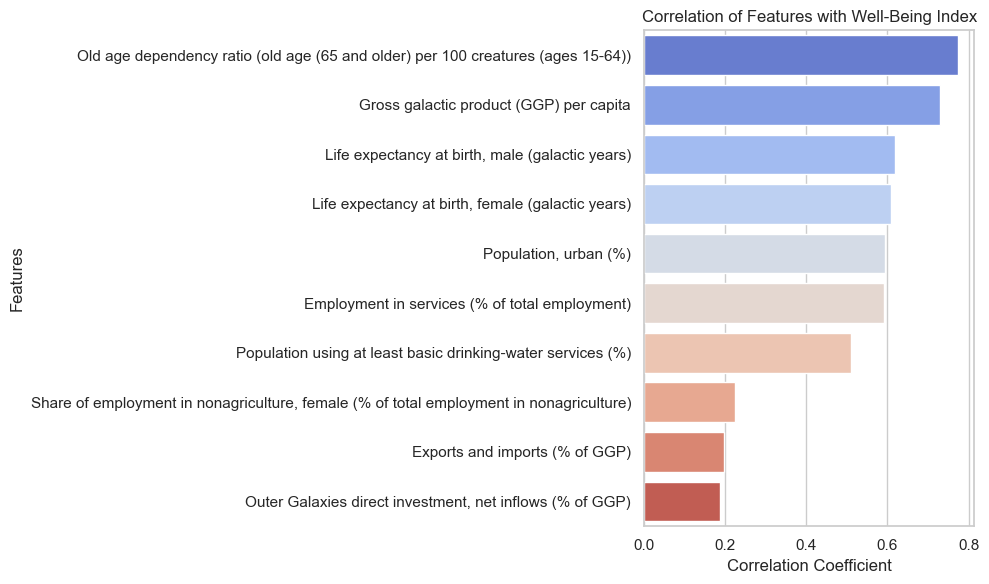

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Correlation matrix with Well-Being Index
corr_matrix = df3.corr(numeric_only=True).head(10)
wellbeing_corr = corr_matrix["Well-Being Index"].sort_values(ascending=False)

# Plot the correlation with Well-Being Index
plt.figure(figsize=(10, 6))
sns.barplot(x=wellbeing_corr.values, y=wellbeing_corr.index, palette='coolwarm')
plt.title("Correlation of Features with Well-Being Index")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


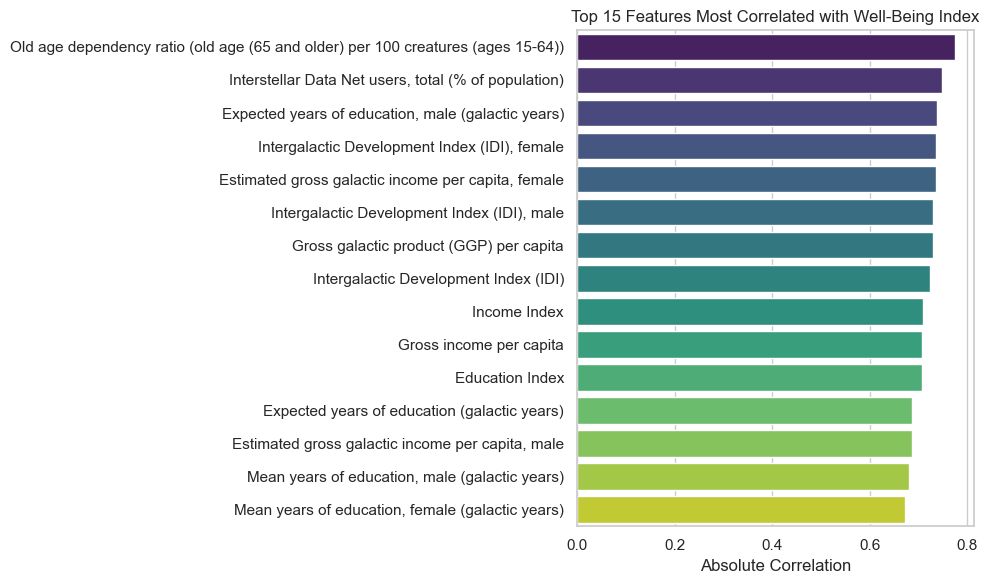

(Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.774678
 Interstellar Data Net users, total (% of population)                                0.747402
 Expected years of education, male (galactic years)                                  0.737618
 Intergalactic Development Index (IDI), female                                       0.736254
 Estimated gross galactic income per capita, female                                  0.735751
 Intergalactic Development Index (IDI), male                                         0.729633
 Gross galactic product (GGP) per capita                                             0.728522
 Intergalactic Development Index (IDI)                                               0.722281
 Income Index                                                                        0.707868
 Gross income per capita                                                             0.706930
 Name: Well-Being Index, dtype: float64,
 Gross enrolment ra

In [229]:
# 2. Correlation with target variable
correlation_with_target = df3.corr(numeric_only=True)['Well-Being Index'].drop('Well-Being Index')
top_corr = correlation_with_target.abs().sort_values(ascending=False).head(15)

# Barplot of most correlated features (absolute values)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title('Top 15 Features Most Correlated with Well-Being Index')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

# Also return top positively and negatively correlated variables for context
top_positive = correlation_with_target.sort_values(ascending=False).head(10)
top_negative = correlation_with_target.sort_values().head(10)

top_positive, top_negative

In [231]:
import pandas as pd

df4 = pd.read_csv('Data/Validation.csv')
info1 = df4.info()
info1

df4.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       720 non-null    int64  
 1   galactic year                                                                            720 non-null    int64  
 2   galaxy                                                                                   720 non-null    object 
 3   existence expectancy index                                                               720 non-null    float64
 4   existence expectancy at birth                                                            720 non-null    float64
 5   Gross income per capita                                         

(720, 81)

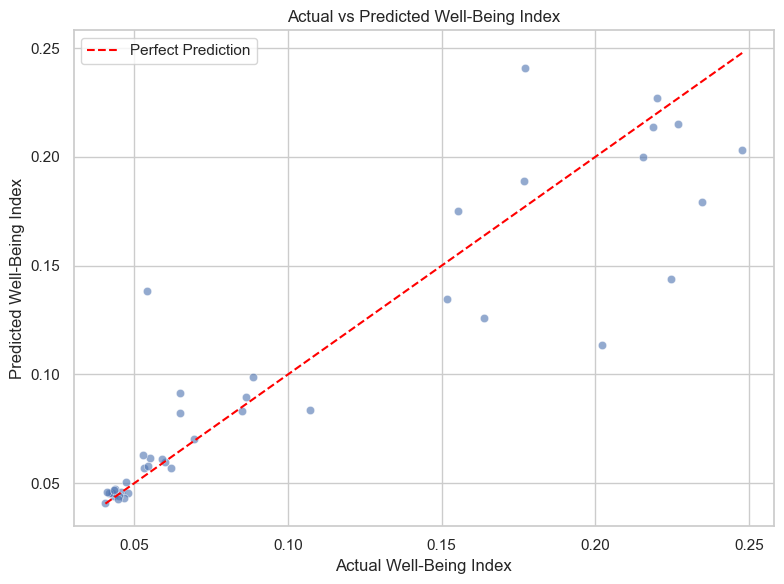

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the original training data
df = pd.read_csv('Data/Train_data.csv')

# True and predicted values from test set (as used earlier)
y_test_true = y_test  # Already defined earlier
y_test_pred = y_pred  # Already defined earlier

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_true, y=y_test_pred, alpha=0.6)

# Plot y=x line
plt.plot([y_test_true.min(), y_test_true.max()], 
         [y_test_true.min(), y_test_true.max()], 
         color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Well-Being Index')
plt.ylabel('Predicted Well-Being Index')
plt.title('Actual vs Predicted Well-Being Index')
plt.legend()
plt.tight_layout()

plt.show()


In [237]:
df.head()

,Population using at least basic drinking-water services (%),"Population, urban (%)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)",Employment in services (% of total employment),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Gross galactic product (GGP) per capita,"Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),...,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,Population using at least basic sanitation services (%),Well-Being Index
0,111.581998,44.449550,10.674597,73.984501,76.953121,45.361420,52.216844,41546.69276,23.308655,151.631513,...,0.929290,72.064442,22895.421800,0.692585,13.859396,8.954817,0.699551,0.658166,73.418564,0.056058
1,76.993595,86.908068,14.180551,52.321446,62.821547,48.975746,57.658300,17879.43470,5.763886,170.598161,...,0.668869,64.947110,29717.638980,0.657748,12.021175,9.096617,0.599741,0.725223,45.565775,0.048410
2,106.741248,31.705293,16.493044,67.641153,68.598407,28.504859,41.338585,19701.73342,19.946561,83.669252,...,0.836663,74.954748,9701.164804,0.556429,12.621836,5.456283,0.575830,0.482430,43.096166,0.050051
3,69.669729,48.680820,8.610838,48.611363,62.061961,76.879539,47.536339,20835.46220,16.868638,205.307595,...,0.493076,58.745542,15454.311590,0.813354,13.301968,6.441421,0.669169,0.613812,81.054848,0.045143
4,118.147473,90.394701,32.190948,85.729074,88.260596,97.725185,57.473459,57511.22373,22.064298,174.188018,...,0.981500,84.314738,63783.893770,1.211279,19.951256,13.367147,1.026684,0.994512,132.889120,0.189309
